<a href="https://colab.research.google.com/github/mariaeco/ICD_project_Maria/blob/main/ProjetoICD_Maria_ExploracaoInicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Título: "Efeito das diferenças socioeconômicas sobre as notas do Enem na Paraíba"**

## **Objetivo geral:**
Avaliar o perfil socioeconômico dos Estudantes na Paraíba e seus efeitos sobre o desempenho no Exame Nacional de Ensino Médio

###*Objetivos Específicos:*
Avaliar a relação dos fatores abaixo com o desempenho no Enem:
- tipo de escola (privada, particular)
- tipo de dependência admnistrativa (Federal, Estadual, Municipal, Privada)
- cor/raça
- tipo de localização (Rural, Urbana)
- escolaridade dos pais
- tipo de ocupação dos pais
- renda familiar
- numero de pessoas na casa
- acesso a celular, computador e internet

#**EXPLORAÇÕES INICIAIS**


###**Pacotes Utilizados**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###**Banco de Dados Selecionado**

In [2]:
dfEnem = pd.read_csv('https://raw.githubusercontent.com/mariaeco/ICD_project_Maria/main/DADOS/MicroDadosEnemSelected.csv', sep="\t", encoding='ISO-8859-1' )
dfEnem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_COR_RACA,TP_ESCOLA,CO_ESCOLA,CO_MUNICIPIO_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,IN_NOME_SOCIAL,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q023,Q024,Q025
0,190001037515,2019,2507507,João Pessoa,PB,3,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,G,G,E,E,1,Q,A,B,B
1,190001125426,2019,2504009,Campina Grande,PB,1,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,B,E,A,A,4,B,A,A,B
2,190001141066,2019,2516607,Tavares,PB,3,1,NaN,NaN,NaN,NaN,0,620.7,654.7,607.4,831.4,0,920.0,E,G,D,D,4,E,A,C,B
3,190001141273,2019,2502409,Bonito de Santa Fé,PB,3,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,B,C,A,A,4,C,A,A,B
4,190001165087,2019,2514503,São José de Piranhas,PB,0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1,NaN,H,E,B,B,4,B,A,A,B


In [3]:
#Nova coluna com as médias das Notas
dfEnem.drop(['TP_LINGUA'], axis=1, inplace=True)
col = dfEnem.loc[:,'NU_NOTA_CN':'NU_NOTA_REDACAO']
dfEnem['NOTA_MEDIA'] = col.mean(axis=1)
dfEnem

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_COR_RACA,TP_ESCOLA,CO_ESCOLA,CO_MUNICIPIO_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,IN_NOME_SOCIAL,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q023,Q024,Q025,NOTA_MEDIA
0,190001037515,2019,2507507,João Pessoa,PB,3,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,G,G,E,E,1,Q,A,B,B,NaN
1,190001125426,2019,2504009,Campina Grande,PB,1,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,B,E,A,A,4,B,A,A,B,NaN
2,190001141066,2019,2516607,Tavares,PB,3,1,NaN,NaN,NaN,NaN,0,620.7,654.7,607.4,831.4,920.0,E,G,D,D,4,E,A,C,B,726.84
3,190001141273,2019,2502409,Bonito de Santa Fé,PB,3,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,B,C,A,A,4,C,A,A,B,NaN
4,190001165087,2019,2514503,São José de Piranhas,PB,0,1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,H,E,B,B,4,B,A,A,B,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147775,190006119856,2019,2516508,Taperoá,PB,3,1,NaN,NaN,NaN,NaN,0,355.7,346.4,392.9,477.9,340.0,B,G,C,D,4,B,A,A,B,382.58
147776,190006119857,2019,2504009,Campina Grande,PB,1,1,NaN,NaN,NaN,NaN,0,442.4,522.0,522.0,456.3,460.0,C,E,C,B,3,C,A,A,B,480.54
147777,190006119858,2019,2500601,Alhandra,PB,1,2,NaN,NaN,NaN,NaN,0,397.5,412.0,366.8,402.4,580.0,C,C,B,B,3,B,A,A,A,431.74
147778,190006119859,2019,2509107,Mari,PB,3,1,NaN,NaN,NaN,NaN,0,540.2,542.7,611.7,644.6,720.0,F,E,B,F,3,E,A,B,B,611.84


## **Número de Candidatos Por Município**

---



In [4]:
N_municipio=dfEnem.groupby(by=['NO_MUNICIPIO_RESIDENCIA'], as_index=False)['NU_INSCRICAO'].count()
N_municipio.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)
N_municipio['Porcentagem']=N_municipio['NU_INSCRICAO']/N_municipio['NU_INSCRICAO'].sum()*100
N_municipio

,NO_MUNICIPIO_RESIDENCIA,NU_INSCRICAO,Porcentagem
93,João Pessoa,37219,25.185411
48,Campina Grande,21735,14.707674
133,Patos,3981,2.693869
169,Santa Rita,3815,2.581540
22,Bayeux,3389,2.293274
...,...,...,...
130,Ouro Velho,61,0.041278
131,Parari,60,0.040601
167,Santa Inês,56,0.037894
13,Areia de Baraúnas,54,0.036541


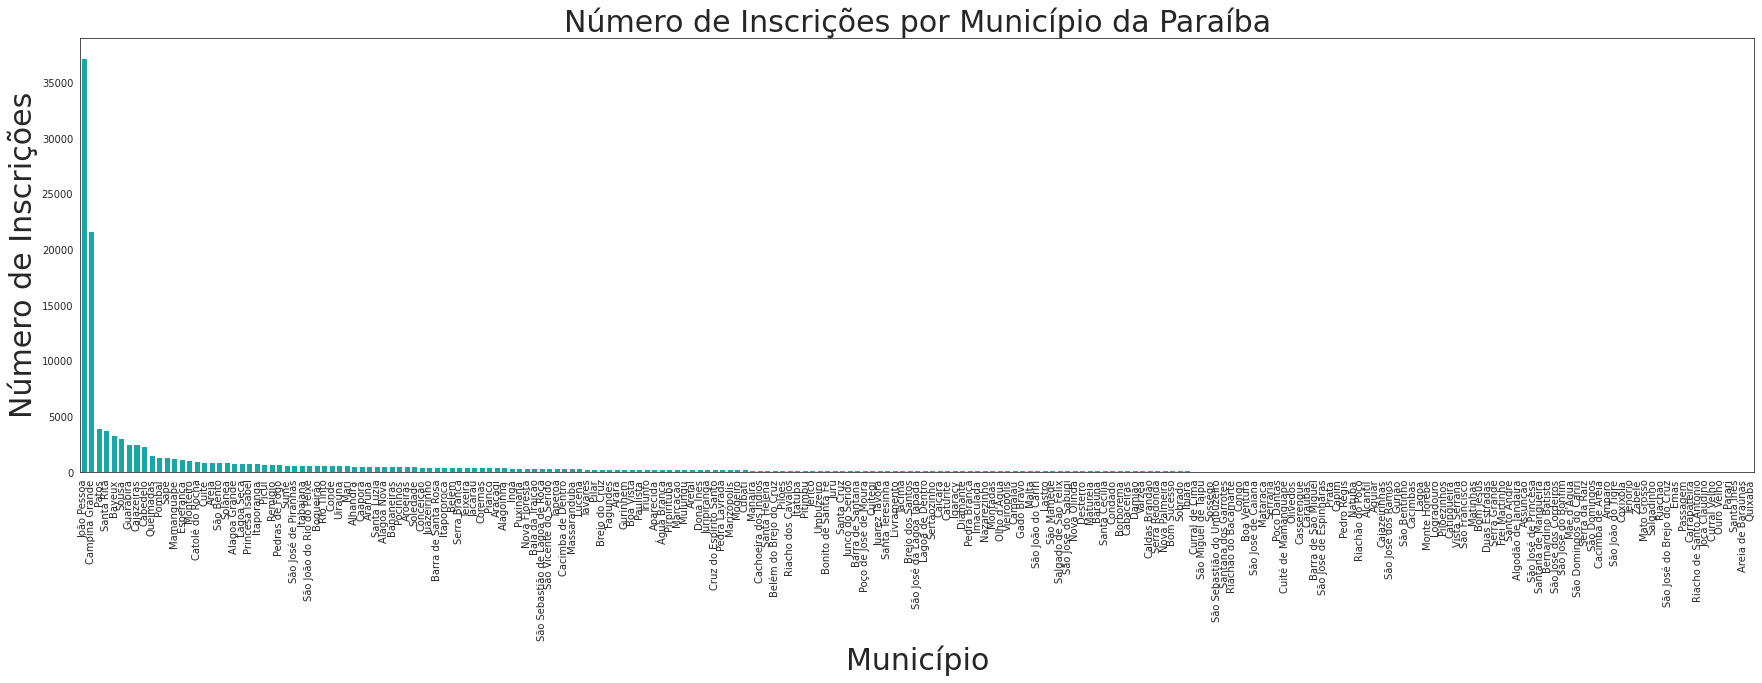

In [5]:
sns.set_style("white")
plt.subplots(figsize=(30,8));
sns.barplot(x ='NO_MUNICIPIO_RESIDENCIA', y ='NU_INSCRICAO', color="c", data = N_municipio);
plt.xticks(rotation=90);
plt.title("Número de Inscrições por Município da Paraíba", fontsize=30)
plt.xlabel("Município", fontsize=30);
plt.ylabel("Número de Inscrições", fontsize=30);


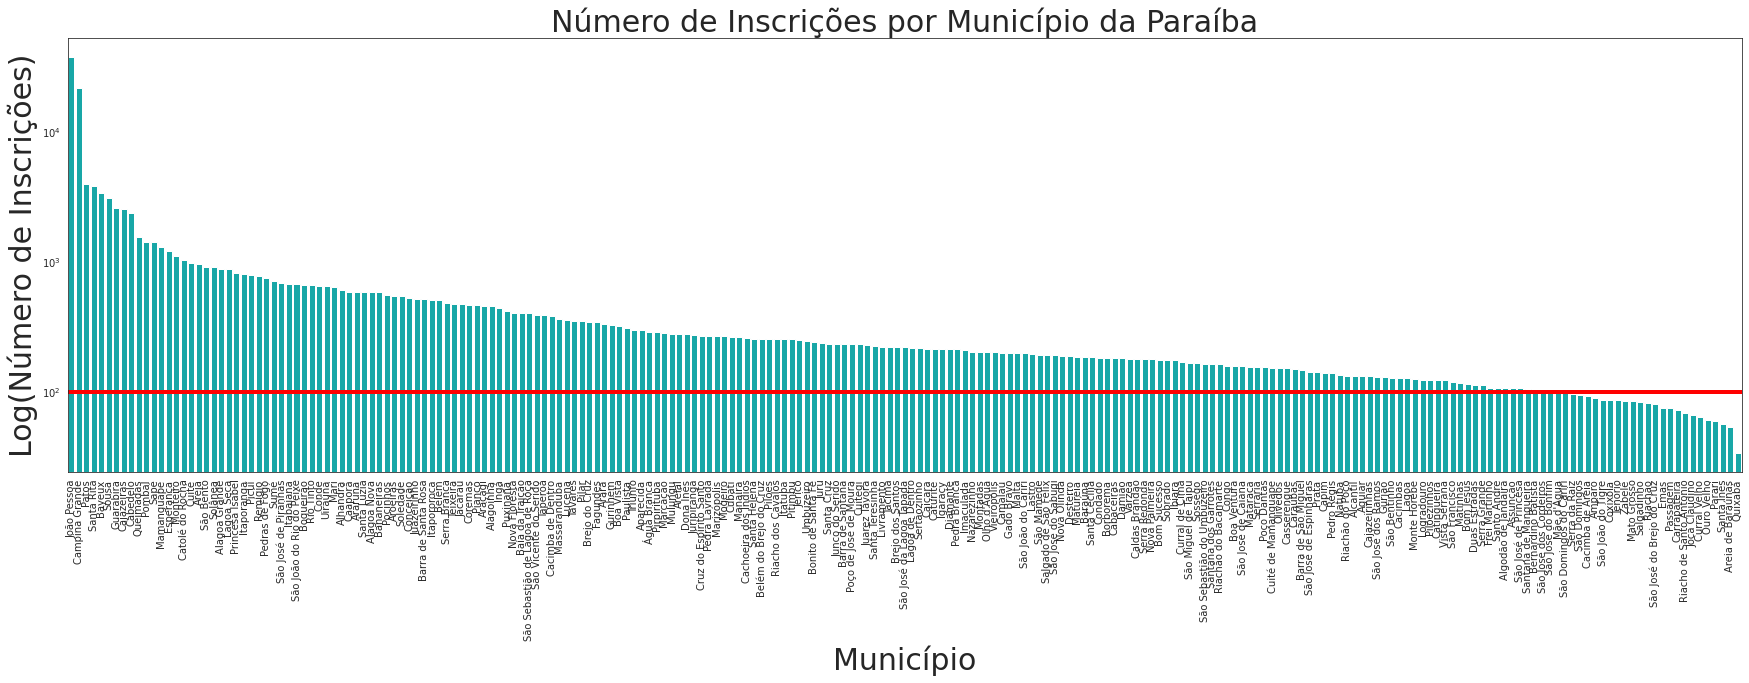

In [6]:
sns.set_style("white")
plt.subplots(figsize=(30,8));
sns.barplot(x = 'NO_MUNICIPIO_RESIDENCIA', y = 'NU_INSCRICAO', color="c", data = N_municipio);
plt.yscale("log");
plt.xticks(rotation=90);
plt.axhline(y=100, color = 'r', ls = '-', linewidth=4);
plt.title("Número de Inscrições por Município da Paraíba", fontsize=30)
plt.xlabel("Município", fontsize=30);
plt.ylabel("Log(Número de Inscrições)", fontsize=30);

## **Relação entre a nota do Enem e o Tipo de Escola (Pública, Privada)**
Análise por Boxplot

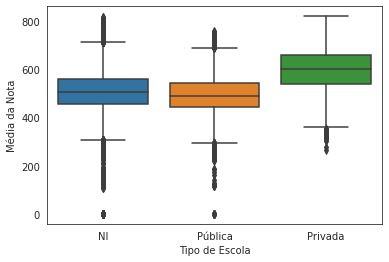

In [7]:
sns.set_style("white")
sns.boxplot(x="TP_ESCOLA", y="NOTA_MEDIA", data=dfEnem)
plt.xlabel("Tipo de Escola")
plt.ylabel("Média da Nota")
plt.xticks([0, 1, 2], ['NI', 'Pública', 'Privada'])
plt.show()
#Há um grande número de não informados. Para esse caso  não tenho interesse no não informado
#Nesse formato tenho que fazer um gráfico para cada nota
#Fazer um melt para poder plotar vários os gráficos de uma vez.

In [8]:
dfEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'TP_COR_RACA',
       'TP_ESCOLA', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'IN_NOME_SOCIAL',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q023', 'Q024', 'Q025', 'NOTA_MEDIA'], dtype=object)

In [9]:
vars =['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'TP_COR_RACA',
       'TP_ESCOLA', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'IN_NOME_SOCIAL',
       'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q023', 'Q024', 'Q025']
dfEnemMELT = pd.melt(dfEnem, id_vars=vars, value_vars=['NOTA_MEDIA','NU_NOTA_CN',	'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'] )
dfEnemMELT.rename(columns={'value': 'Nota', 'variable':'Prova'}, inplace=True)
dfEnemMELT.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_COR_RACA,TP_ESCOLA,CO_ESCOLA,CO_MUNICIPIO_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,IN_NOME_SOCIAL,Q001,Q002,Q003,Q004,Q005,Q006,Q023,Q024,Q025,Prova,Nota
0,190001037515,2019,2507507,João Pessoa,PB,3,1,NaN,NaN,NaN,NaN,0,G,G,E,E,1,Q,A,B,B,NOTA_MEDIA,NaN
1,190001125426,2019,2504009,Campina Grande,PB,1,1,NaN,NaN,NaN,NaN,0,B,E,A,A,4,B,A,A,B,NOTA_MEDIA,NaN
2,190001141066,2019,2516607,Tavares,PB,3,1,NaN,NaN,NaN,NaN,0,E,G,D,D,4,E,A,C,B,NOTA_MEDIA,726.84
3,190001141273,2019,2502409,Bonito de Santa Fé,PB,3,1,NaN,NaN,NaN,NaN,0,B,C,A,A,4,C,A,A,B,NOTA_MEDIA,NaN
4,190001165087,2019,2514503,São José de Piranhas,PB,0,1,NaN,NaN,NaN,NaN,0,H,E,B,B,4,B,A,A,B,NOTA_MEDIA,NaN


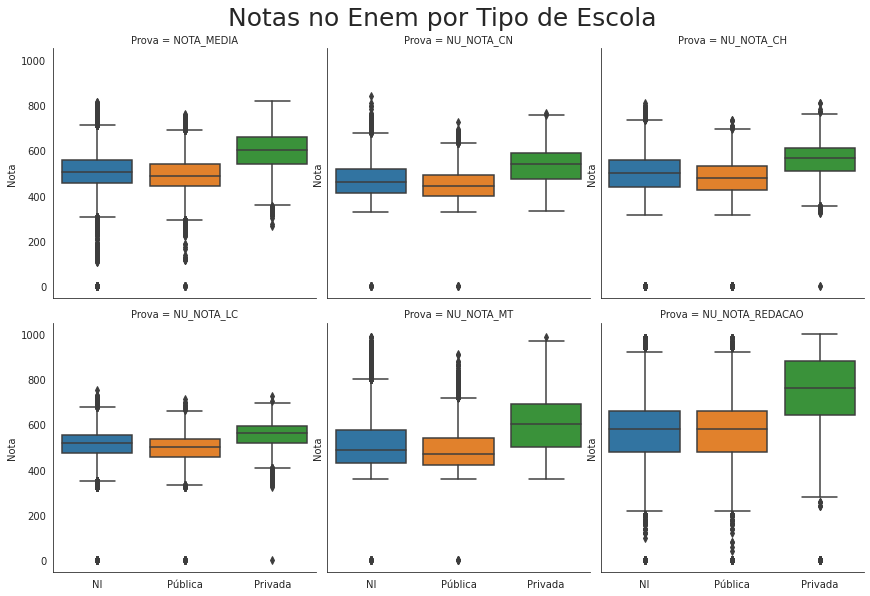

In [10]:
sns.set_style("white")
g = sns.catplot(x="TP_ESCOLA", y="Nota", #hue = dose
                col="Prova",col_wrap=3, 
                data=dfEnemMELT, kind="box",
                height=4, aspect=1);
g.fig.suptitle("Notas no Enem por Tipo de Escola",y=1.03, fontsize=25)
g.set(ylabel="Nota", xlabel="")
plt.xticks([0, 1, 2], ['NI', 'Pública', 'Privada'])
plt.show()

## **Relação entre a nota do Enem e o Tipo de Admnistração da Escola (Federal, Estadual, Municipal, Privada)**
Análise por Boxplot

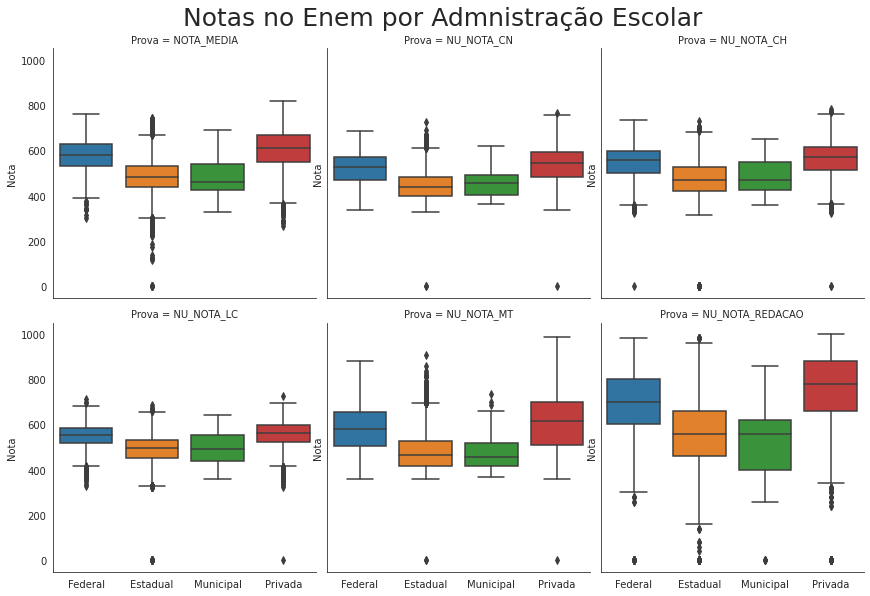

In [11]:
sns.set_style("white")
g = sns.catplot(x="TP_DEPENDENCIA_ADM_ESC", y="Nota", #hue = dose
                col="Prova",col_wrap=3, 
                data=dfEnemMELT, kind="box",
                height=4, aspect=1);

g.fig.suptitle("Notas no Enem por Admnistração Escolar",y=1.03, fontsize=25)
g.set(ylabel="Nota", xlabel="")
g.set_xticklabels(['Federal', 'Estadual', 'Municipal','Privada'])
plt.show()

##**Nota por Raça/Cor**
Análise por Boxplot

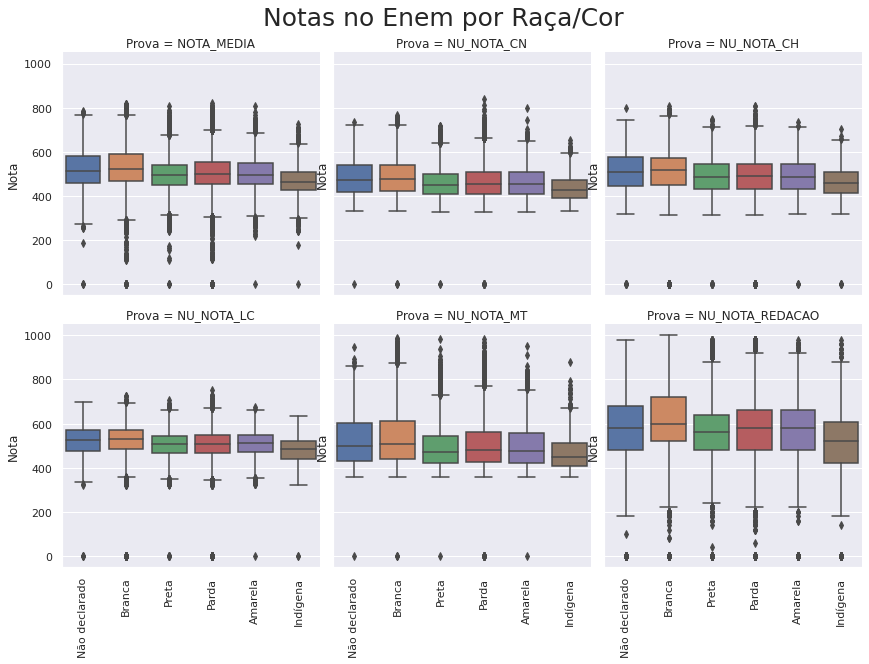

In [12]:
sns.set_style("white")
sns.set(font_scale=1)
g = sns.catplot(x="TP_COR_RACA", y="Nota", #hue = dose
                col="Prova",col_wrap=3, 
                data=dfEnemMELT, kind="box",
                height=4, aspect=1);
g.fig.suptitle("Notas no Enem por Raça/Cor",y=1.03, fontsize=25)
g.set(ylabel="Nota", xlabel="")
g.set_xticklabels(['Não declarado', 'Branca', 'Preta','Parda','Amarela','Indígena'], rotation=90)

plt.show()




##**Distribuição das Nota do Enem na Paraíba por tipo de escola**

In [33]:
dfEnem['TP_ESCOLA'] = dfEnem['TP_ESCOLA'].astype(str)
dfEnem['TP_ESCOLA'] = dfEnem['TP_ESCOLA'].replace({'1': 'Não Informado','2':'Pública','3':'Privada'})

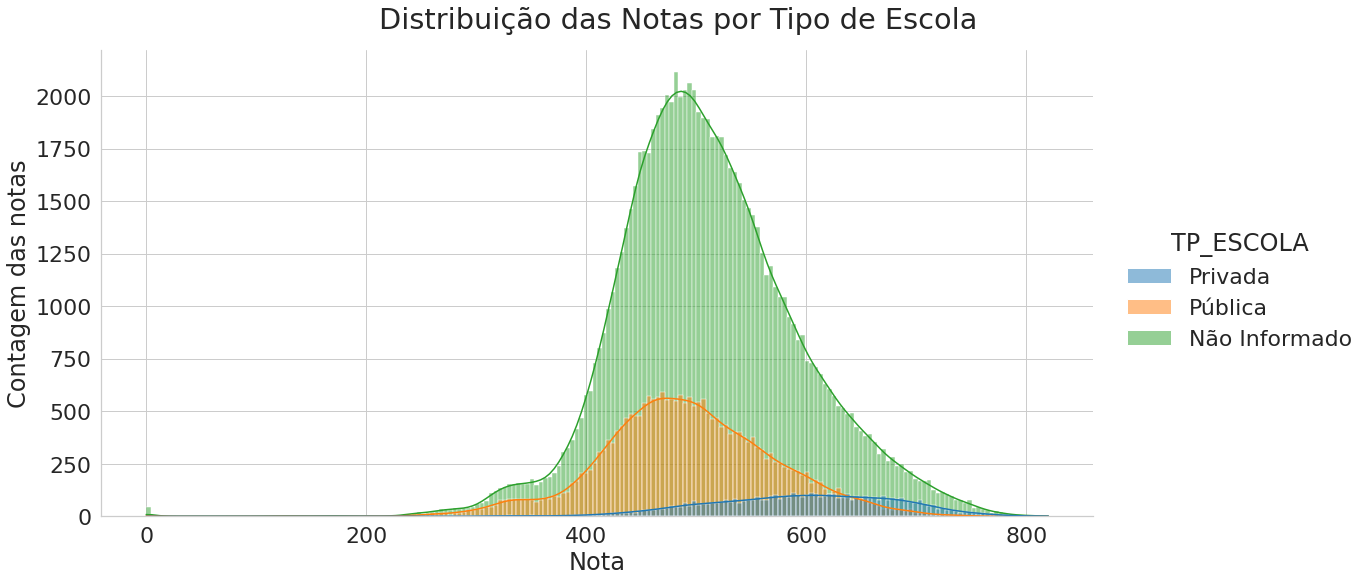

In [36]:
# histograma da nota média dos candidadtos, excluindo as notas zero
sns.set(style='whitegrid',font_scale=2,color_codes=True);
sns.set_palette("tab10")

g=sns.displot(dfEnem, hue='TP_ESCOLA', 
                x ="NOTA_MEDIA", height=8, aspect=2,bins=200, hue_order=['Privada', 'Pública','Não Informado'],
              alpha=0.5, kde=True)
g.fig.suptitle("Distribuição das Notas por Tipo de Escola",y=1.03);
g.set(ylabel="Contagem das notas", xlabel="Nota");


##**Distribuição das Nota do Enem na Paraíba por Localização de escola**

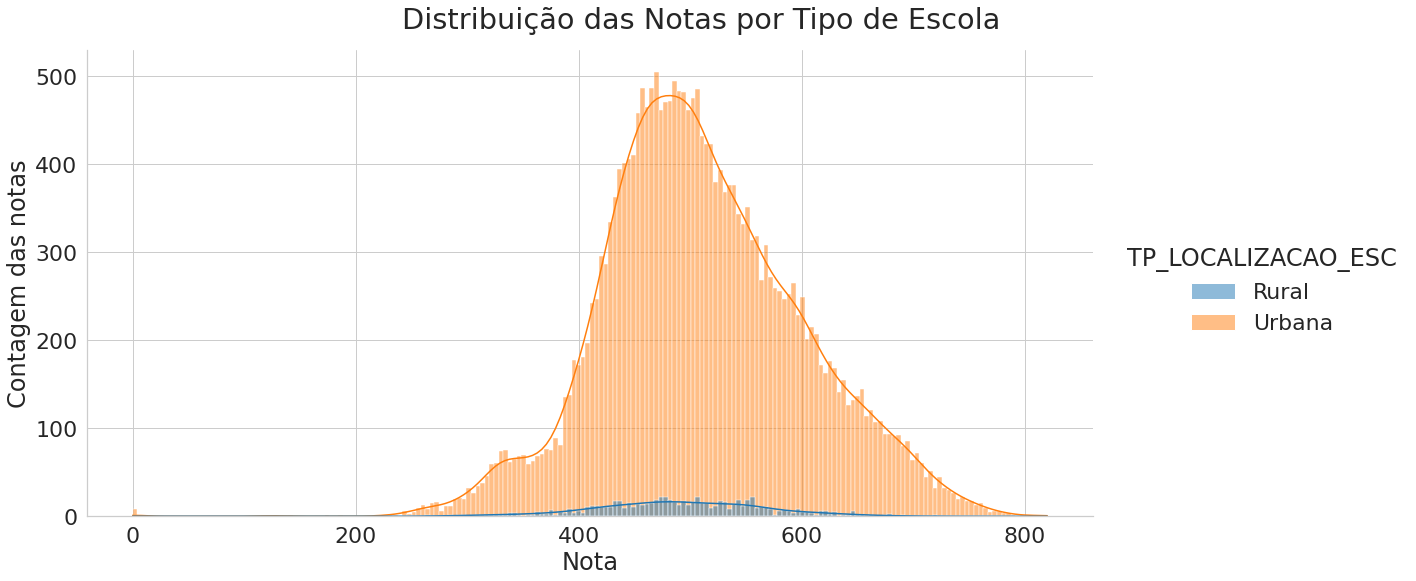

In [41]:
dfEnem['TP_LOCALIZACAO_ESC'] = dfEnem['TP_LOCALIZACAO_ESC'].replace({1: 'Urbana',2:'Rural'})

# histograma da nota média dos candidadtos, excluindo as notas zero
sns.set(style='whitegrid',font_scale=2,color_codes=True);
sns.set_palette("tab10")

g=sns.displot(dfEnem, hue='TP_LOCALIZACAO_ESC', 
                x ="NOTA_MEDIA", height=8, aspect=2,bins=200, hue_order=['Rural', 'Urbana'],
              alpha=0.5, kde=True)
g.fig.suptitle("Distribuição das Notas por Tipo de Escola",y=1.03);
g.set(ylabel="Contagem das notas", xlabel="Nota");